## Fintech Lending Model: Machine Learning for multi-class classification - Dhara Khamar 

### Business problem overview:
- Fintech is a portmanteau of the words “financial” and “technology”. 
- Lending fintech, also known as peer-to-peer (P2P) lending or online lending, involves the use of technology to facilitate the borrowing and lending of money directly between individuals or between individuals and businesses.
- Peer-to-peer lending or crowd lending is a form of debt financing wherein borrowers can request a loan from another individual without the need for any financial institutions to act as the intermediary.
- Lending fintech, particularly in the peer-to-peer (P2P) lending space, comes with various risks. 
- Credit Risk: Borrowers may fail to repay their loans, leading to financial losses for lenders. This risk is inherent in any lending activity and is influenced by the borrower's creditworthiness.

### Problem Statement: 
- The task is to leveraging the extensive repository of basic bank details and credit-related information accumulated over the years. The organizational leadership has articulated the objective of developing an advanced system capable of autonomously categorizing individuals into distinct credit score brackets, with the overarching aim of streamlining and minimizing manual efforts in this process.

### Objective:
- Classification of Loan Applicants:
The primary goal is to categorize loan applicants into three distinct classes—namely, "Good," "Standard," and "Bad"—by employing a comprehensive analysis of their credit scores.


### Dataset & DataSaurce : Kaggle 

Given a person’s credit-related information,

- Age: Represents the age of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts:Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
- Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

## Step 1: Data Reading and understanding

In [1]:
# import libraries and warnings

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets import and read the dataset
Score_df = pd.read_csv("Score.csv")
Score_df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [3]:
# Lets look at Shape of datset and datatypes of variables 

print("Shape of datset:", Score_df.shape)

Score_df.info(verbose=1)

Shape of datset: (99960, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 

In [4]:
#Lets look at contineous data variables
Score_df.describe(include='float64')

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,5.532853,14.535174,3.533974,4196.814288,10.396953,1426.514966,105.565802
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,2.067698,8.741047,2.446156,3186.518163,6.510846,1155.252504,125.820983
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,4.000000,7.000000,2.000000,1626.594167,5.500000,566.080000,29.054273
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,5.000000,13.000000,3.000000,3091.386667,9.340000,1166.470000,66.058063
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,7.000000,20.000000,5.000000,5957.715000,14.680000,1948.200000,145.584994
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633333,29.980000,4998.070000,1779.103254


### Insights: 
- Dataset has 21 variables and 99960 rows. 
- After loading the data, we see that there are multiple columns, both numerical and categorical.
- Looking at the Description of the data, we do see some skewness in the data and some irregularities, which we will deal with in the Feature engineering section.


## Step 2: Data Cleaning

### Missing Values check

In [5]:
# missing values in each column
Score_df.isna().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

### Duplicate entries check

In [6]:
# check for duplicate entries in datset

Score_df_temp = Score_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
Score_df_temp.drop_duplicates(subset=None, inplace=True)

print("Dataset Original shape",Score_df.shape)
print("Dataset shape after removing duplicates",Score_df_temp.shape)

Dataset Original shape (99960, 21)
Dataset shape after removing duplicates (99960, 21)


### Numerical and Categorical columns 

In [7]:
# Numerical columns 
Score_df.select_dtypes(include=['float64']).columns

Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Total_EMI_per_month'],
      dtype='object')

In [8]:
# Categorical Columns 
Score_df.select_dtypes(include=['object']).columns

Index(['Payment_of_Min_Amount', 'Credit_Score', 'Credit_Mix',
       'Payment_Behaviour'],
      dtype='object')

In [9]:
Score_df["Credit_Mix"].value_counts()

Standard    45832
Good        30360
Bad         23768
Name: Credit_Mix, dtype: int64

In [10]:
Score_df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35628
NM     12006
Name: Payment_of_Min_Amount, dtype: int64

In [11]:
Score_df["Credit_Score"].value_counts()

Standard    53149
Poor        28988
Good        17823
Name: Credit_Score, dtype: int64

In [12]:
Score_df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: Payment_Behaviour, dtype: int64

### Insights:
- null values and duplicate entries are not present in data


### Outliers handling

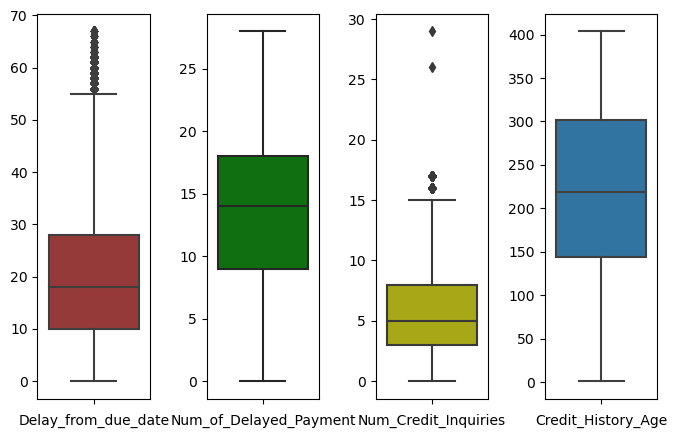

In [13]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(8, 5))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for Delay_from_due_date in the 1st subplot
sns.boxplot(data=Score_df['Delay_from_due_date'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Delay_from_due_date')
 
# draw boxplot for Num_of_Delayed_Payment in the 2nd subplot
sns.boxplot(data=Score_df['Num_of_Delayed_Payment'], ax=ax[1], color='g')
ax[1].set_xlabel('Num_of_Delayed_Payment')
 
# draw boxplot for Num_Credit_Inquiries in the 3rd subplot
sns.boxplot(data=Score_df['Num_Credit_Inquiries'], ax=ax[2], color='y')
ax[2].set_xlabel('Num_Credit_Inquiries')
 
# finally draw boxplot for Credit_History_Age in the 4th subplot
sns.boxplot(data=Score_df['Credit_History_Age'], ax=ax[3])
ax[3].set_xlabel('Credit_History_Age')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

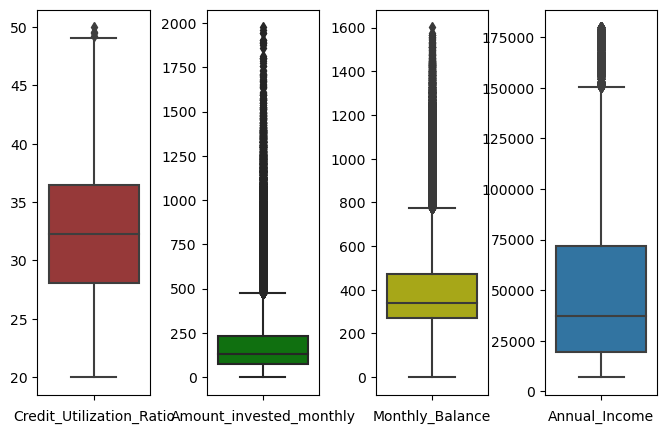

In [14]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(8, 5))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for Credit_Utilization_Ratio in the 1st subplot
sns.boxplot(data=Score_df['Credit_Utilization_Ratio'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Credit_Utilization_Ratio')
 
# draw boxplot for Amount_invested_monthly in the 2nd subplot
sns.boxplot(data=Score_df['Amount_invested_monthly'], ax=ax[1], color='g')
ax[1].set_xlabel('Amount_invested_monthly')
 
# draw boxplot for Monthly_Balance in the 3rd subplot
sns.boxplot(data=Score_df['Monthly_Balance'], ax=ax[2], color='y')
ax[2].set_xlabel('Monthly_Balance')
 
# finally draw boxplot for Annual_Income in the 4th subplot
sns.boxplot(data=Score_df['Annual_Income'], ax=ax[3])
ax[3].set_xlabel('Annual_Income')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

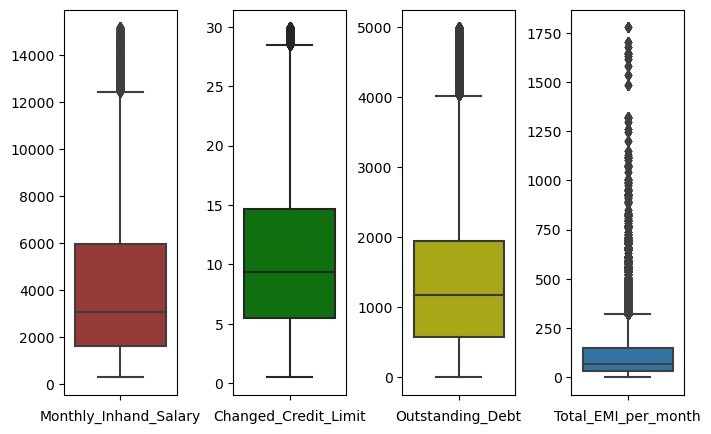

In [15]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(8, 5))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

# draw boxplot for Monthly_Inhand_Salary in the 1st subplot
sns.boxplot(data=Score_df['Monthly_Inhand_Salary'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Monthly_Inhand_Salary')
 
# draw boxplot for Changed_Credit_Limit in the 2nd subplot
sns.boxplot(data=Score_df['Changed_Credit_Limit'], ax=ax[1], color='g')
ax[1].set_xlabel('Changed_Credit_Limit')
 
# draw boxplot for Outstanding_Debt in the 3rd subplot
sns.boxplot(data=Score_df['Outstanding_Debt'], ax=ax[2], color='y')
ax[2].set_xlabel('Outstanding_Debt')
 
# finally draw boxplot for Total_EMI_per_month in the 4th subplot
sns.boxplot(data=Score_df['Total_EMI_per_month'], ax=ax[3])
ax[3].set_xlabel('Total_EMI_per_month')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [16]:
cols_to_plot = ['Delay_from_due_date', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                'Outstanding_Debt', 'Monthly_Inhand_Salary']

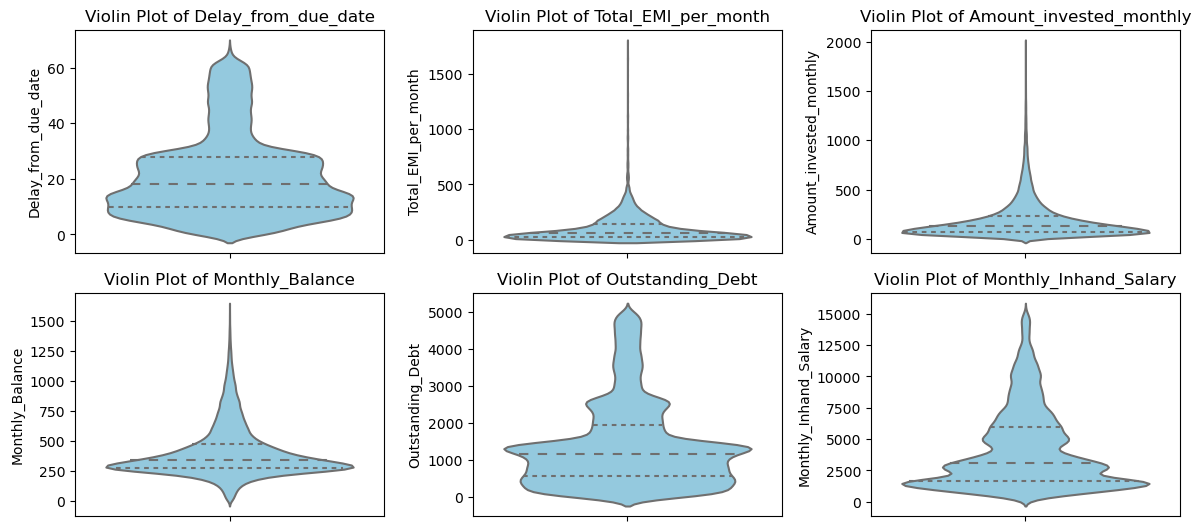

In [17]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=Score_df, y=col, color='skyblue', inner='quartile')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Insights: 
- Looking at the Voilin plots above, we understand that 'Delay_from_due_date', 'Total_EMI_per_month', 'Amount_invested_monthly', 
'Monthly_Balance','Outstanding_Debt', 'Monthly_Inhand_Salary' are the features to be fixed. 
- We would use IQR method and do this.
- We would also keep printing how many rows are being removed, this ensures that not a lot of data gets removed.

In [18]:
# List of columns to remove outliers from
columns_to_remove_outliers = ['Delay_from_due_date', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                'Outstanding_Debt', 'Monthly_Inhand_Salary']

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    initial_rows = data.shape[0]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    removed_rows = initial_rows - data.shape[0]
    print(f"Removed {removed_rows} rows from '{col}' column.")
    return data

# Remove outliers from the specified columns
for col in columns_to_remove_outliers:
    Score_df = remove_outliers_iqr(Score_df, col)

Removed 4002 rows from 'Delay_from_due_date' column.
Removed 4919 rows from 'Total_EMI_per_month' column.
Removed 7393 rows from 'Amount_invested_monthly' column.
Removed 6805 rows from 'Monthly_Balance' column.
Removed 3661 rows from 'Outstanding_Debt' column.
Removed 1339 rows from 'Monthly_Inhand_Salary' column.


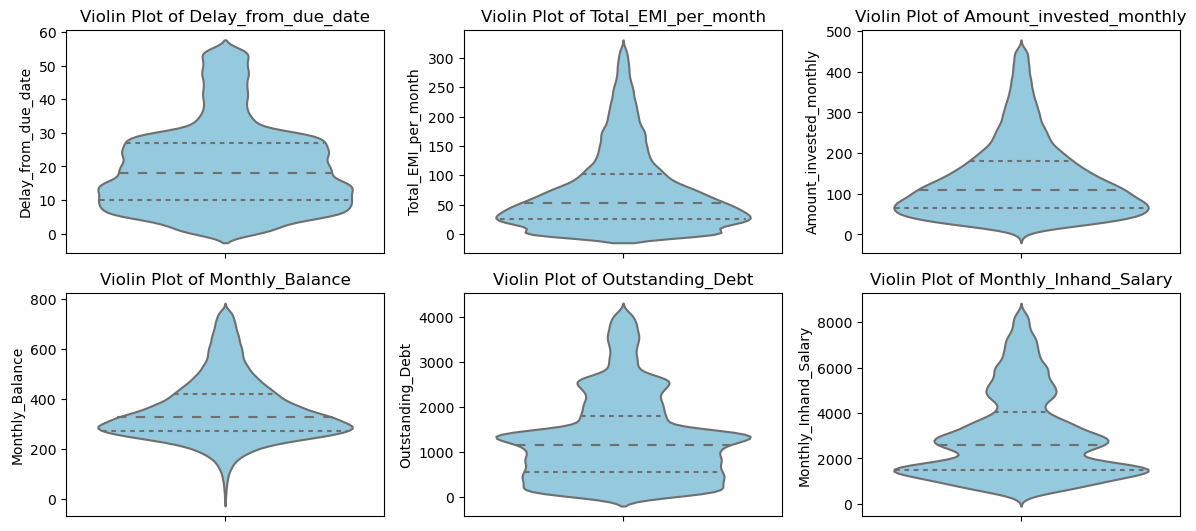

In [19]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_remove_outliers):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=Score_df, y=col, color='skyblue', inner='quartile')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Insights: 
- Now we see in graphs, it is evident that they exhibit significant improvement in terms of distribution. 
- While some outliers are present, it is noteworthy that they adhere to the conditions defined by the Interquartile Range (IQR)

## Step 3: Exploratory Data Analysis

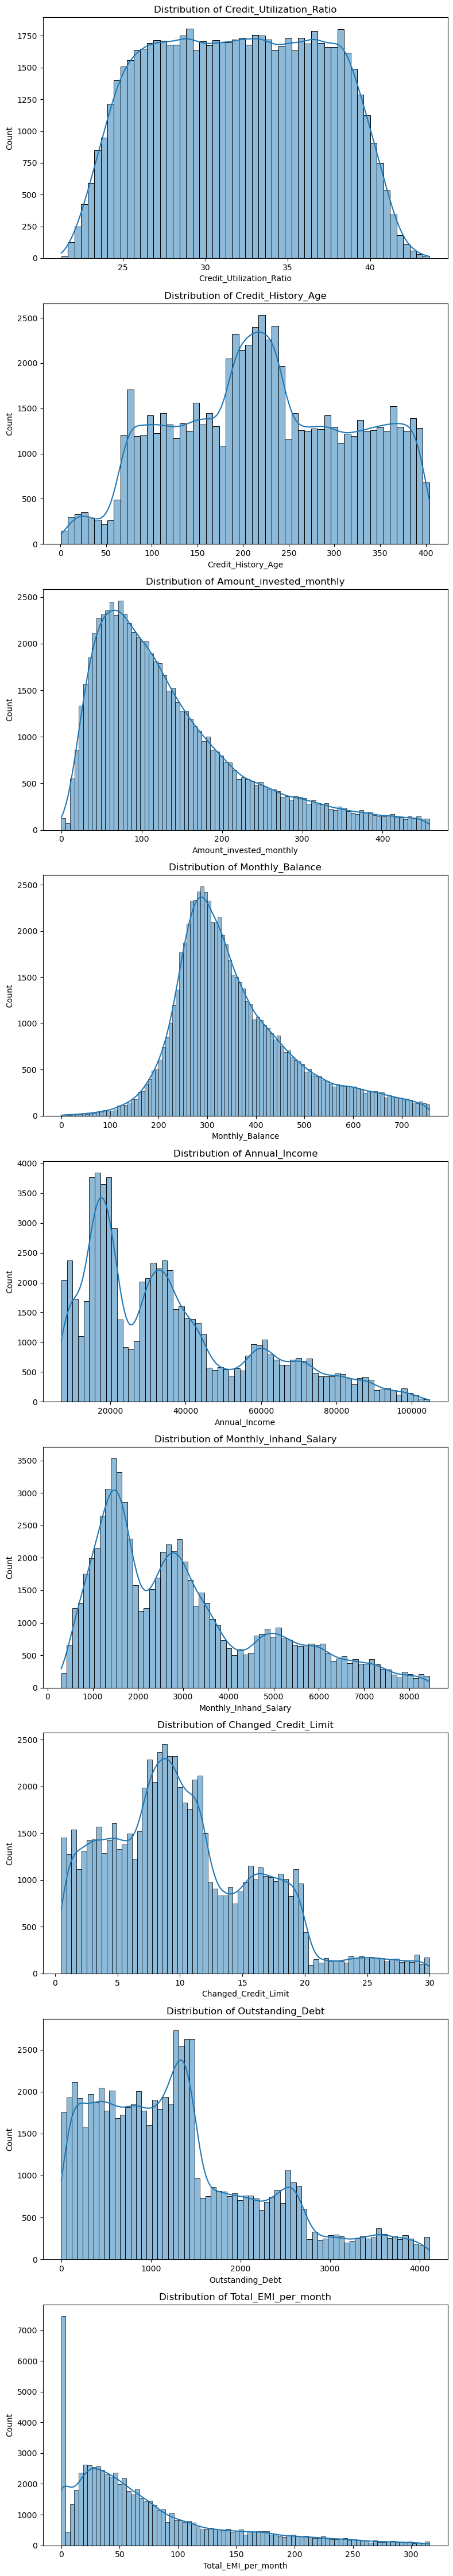

In [20]:
cols_to_plot = ['Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly',
                'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary',
                'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']

# Create subplots
num_plots = len(cols_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 5*num_plots))

# Plot histograms for each feature
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=Score_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
# List of columns to transform
columns_to_transform = ['Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income',
                        'Monthly_Inhand_Salary', 'Outstanding_Debt']

# Apply logarithm transformation to approximate normality and plot histograms
for col in columns_to_transform:
    # Apply logarithm transformation to the column
    Score_df[col] = np.log(Score_df[col])
    

### Insights:
- a characteristic shared by many classification algorithms - highly sensitive to extreme outliers and skewed distributions.
- Considering the observations from the previous graphs, we aim to address these issues by normalizing the feature distributions.
- we intend to apply a log transformation to the features 'Amount_invested_monthly,' 'Monthly_Balance,' 'Annual_Income,' 'Monthly_Inhand_Salary,' and 'Outstanding_Debt.'

### Target Column balance check

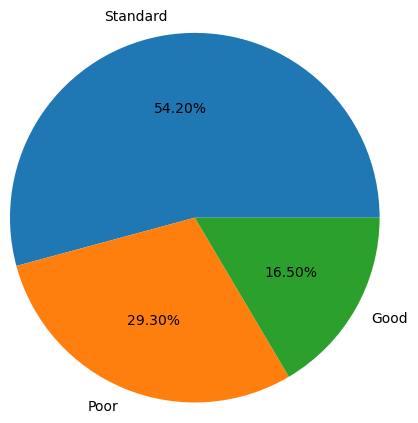

In [22]:
plt.figure(figsize=[8,3])
ser = Score_df["Credit_Score"].value_counts()
plt.pie(x=ser.values, labels=ser.index, autopct="%0.2f%%", radius=2);
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

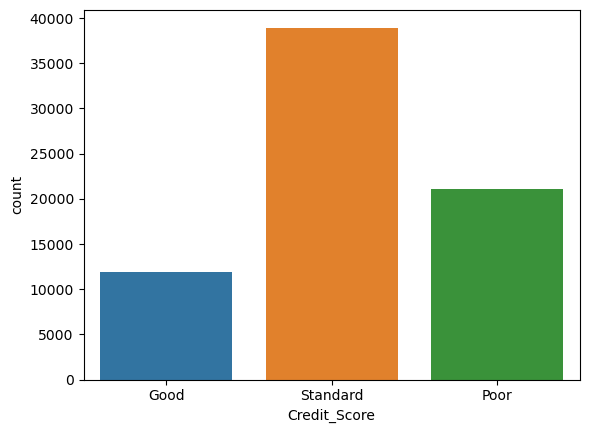

In [23]:
sns.countplot(x='Credit_Score',data=Score_df)

### Insights:
- The target variable has uneven distribution between classes, but the difference isn't too big. 
- We're going to try cost-sensitive learning on the dataset.

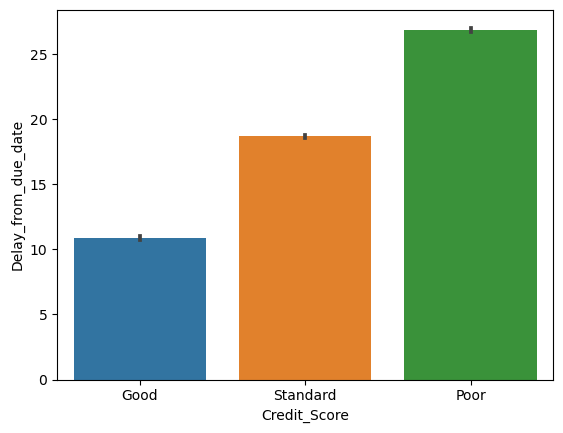

In [24]:
sns.barplot(x='Credit_Score',y='Delay_from_due_date',data=Score_df)
plt.show()

In [25]:
# Lets find out variables with less cardinality
X=Score_df.drop("Credit_Score",axis=1)
numeric=X.select_dtypes(exclude="object").columns

low_cardinality=[col for col in numeric if Score_df[col].nunique()<=30]
low_cardinality

['Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Loan']

In [26]:
# Lets find out variables with high cardinality
high_cardinality=[col for col in numeric if Score_df[col].nunique()>30]
high_cardinality

['Delay_from_due_date',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Age',
 'Annual_Income',
 'Interest_Rate',
 'Monthly_Inhand_Salary',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Total_EMI_per_month']

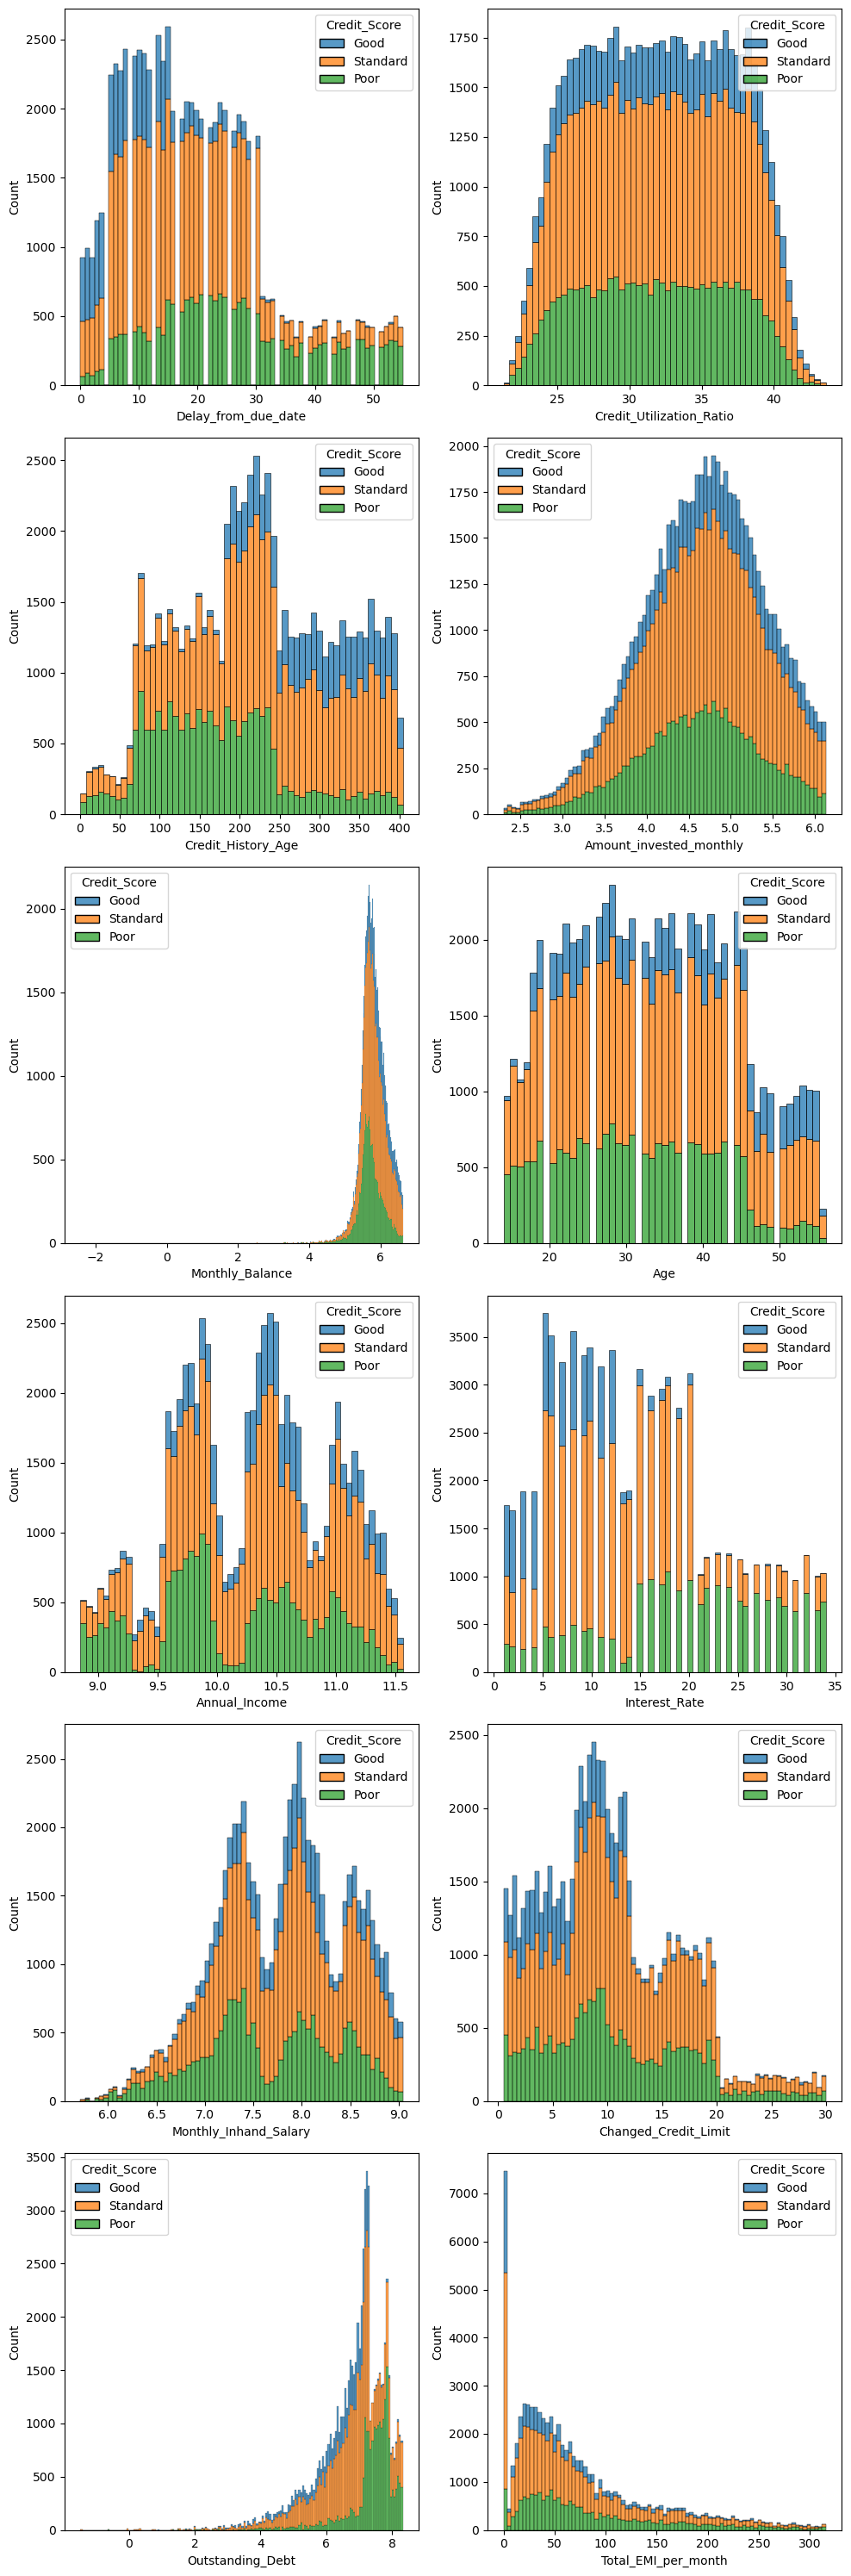

In [27]:
rows=[len(high_cardinality)//2 if len(high_cardinality)%2==0 else len(high_cardinality)//2+1]
fig,axes=plt.subplots(rows[0],2,figsize=(10,30))

ax=axes.flatten()
for i,col in enumerate(high_cardinality):
    sns.histplot(data=Score_df, x=col, hue="Credit_Score", ax=ax[i], multiple="stack");
    
plt.tight_layout()

### Insights: 
- When the values of "Outstanding_Debt," "Interest_Rate," and "Delay_from_due_date" go up, there's a significant increase in the proportion of instances with Bad Credit Scores, while instances with Standard and Good Credit Scores become much fewer.
- Conversely, an increase in "Credit_History_Age" and "Age" leads to a decrease in instances with Bad Credit Scores and a rise in instances with Standard and Good Credit Scores.
- Interestingly, "credit_utilization_ratio" seems to have a similar distribution across all credit score categories.
- Many features don't follow a normal (Gaussian) distribution and have varying scales. To address this, we plan to transform the feature variables.

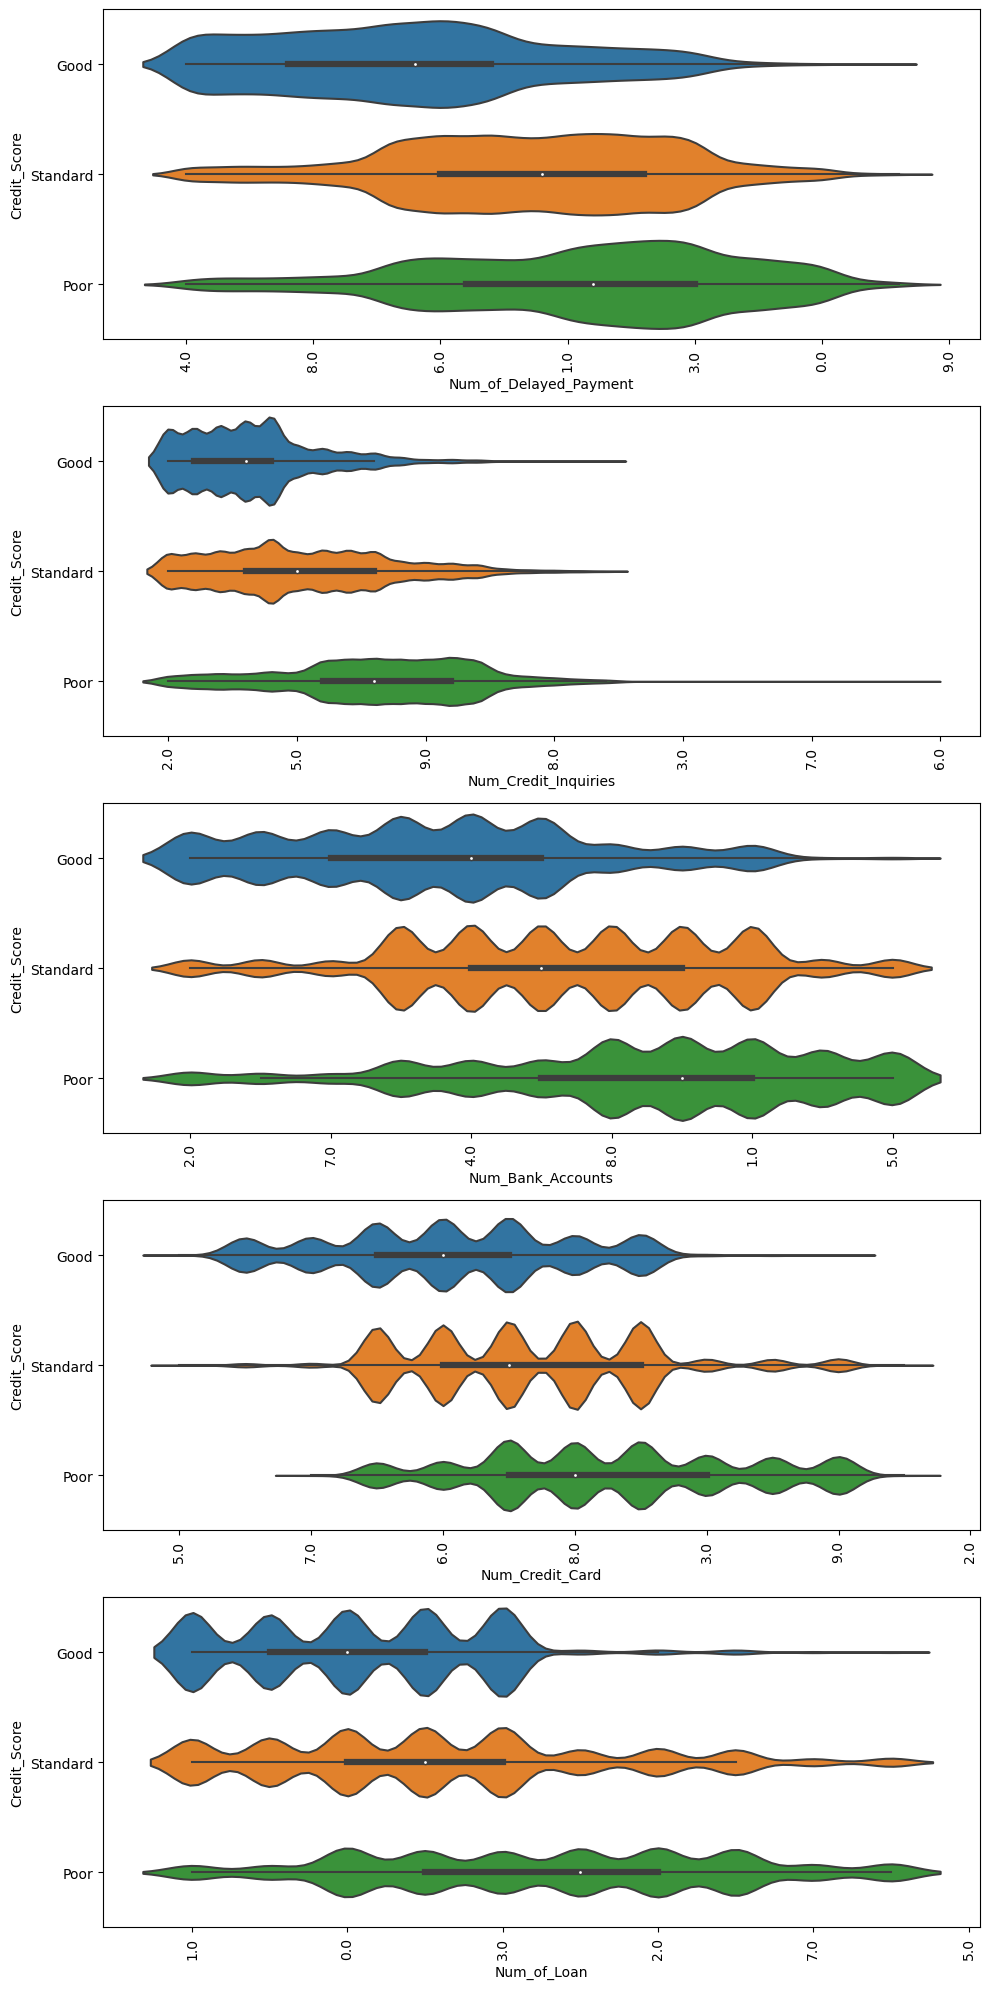

In [28]:
fig,axes=plt.subplots(5,figsize=(10,20))

for i,col in enumerate(low_cardinality):

    ax=axes[i]
    sns.violinplot(x=Score_df[col],y=Score_df["Credit_Score"],ax=ax);
    ax.set_xticklabels(labels=Score_df[col].unique(),rotation=90)
    
plt.tight_layout()

### Insights:
- When the values of "Num_of_Delayed_Payment," "Num_Credit_Inquiries," "Num_Bank_Accounts," "Num_Credit_Card," and "Num_of_Loan" increase, there's a noticeable rise in the proportion of poor credit scores. 
- Instances with good and standard credit scores are considerably less in comparison. 
- The variable "Num_of_Delayed_Payment" particularly demonstrates the most pronounced effect in this regard.

## Step 4: Feature Engineering 

### Target variable label encoding to make it numeric

In [29]:
# Lets take numerical data only for further 
Score_df = Score_df[["Credit_Utilization_Ratio", 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance',\
        'Annual_Income', 'Monthly_Inhand_Salary','Changed_Credit_Limit', 'Outstanding_Debt', \
        'Total_EMI_per_month', 'Credit_Score']] 

In [30]:
# Label encoding for target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col_list = Score_df.select_dtypes(include="object").columns

for col in col_list:
    Score_df["Credit_Score"] = le.fit_transform(Score_df["Credit_Score"].astype(str))

In [31]:
Score_df.head()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,26.822620,265.0,4.387204,5.744586,9.858183,7.509249,11.27,6.69701,49.574949,0
1,31.944960,265.0,4.773057,5.651187,9.858183,7.509249,11.27,6.69701,49.574949,0
2,28.609352,267.0,4.403048,5.802752,9.858183,7.509249,11.27,6.69701,49.574949,0
3,31.377862,268.0,5.295604,5.409194,9.858183,7.509249,11.27,6.69701,49.574949,0
4,24.797347,269.0,3.723768,5.833316,9.858183,7.509249,11.27,6.69701,49.574949,0


## Scaling features - Standard Scaler
We will bring the values to same scale for better fit of algorithm.

In [32]:
Score_df.head()

,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,26.822620,265.0,4.387204,5.744586,9.858183,7.509249,11.27,6.69701,49.574949,0
1,31.944960,265.0,4.773057,5.651187,9.858183,7.509249,11.27,6.69701,49.574949,0
2,28.609352,267.0,4.403048,5.802752,9.858183,7.509249,11.27,6.69701,49.574949,0
3,31.377862,268.0,5.295604,5.409194,9.858183,7.509249,11.27,6.69701,49.574949,0
4,24.797347,269.0,3.723768,5.833316,9.858183,7.509249,11.27,6.69701,49.574949,0


In [33]:
Score_df.isna().sum()

Credit_Utilization_Ratio    0
Credit_History_Age          0
Amount_invested_monthly     0
Monthly_Balance             0
Annual_Income               0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
Credit_Score                0
dtype: int64

In [34]:
cols = list(Score_df.columns)[:-1]
cols

['Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Total_EMI_per_month']

In [35]:
Score_df = Score_df[np.isfinite(Score_df).all(1)]

In [36]:
from sklearn.preprocessing import StandardScaler

cols = list(Score_df.columns)[:-1]
scaler = StandardScaler()
Score_df[cols] = scaler.fit_transform(Score_df[cols])

In [37]:
y = Score_df["Credit_Score"]
X = Score_df[cols]

In [38]:
features = list(Score_df.columns)[:-1]
print("features:", features, sep="\n")

features:
['Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']


### Feature Selection - f_classif from sklearn 

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
#print(data.columns[selector.get_support(indices=True)].tolist())
final_features = Score_df.columns[selector.get_support(indices=True)].tolist()
print(final_features)

['Credit_History_Age', 'Monthly_Balance', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt']


In [40]:
y = Score_df["Credit_Score"]
X = Score_df[final_features]

## Modelling 

In [41]:
#Importing required libraries for modelling and performance measure

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

### Train - Test split of dataset 

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 38884, 2: 38884, 1: 38884})


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Model 1 : K Nearest Neighbour Algorithm

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
pred = neigh.predict(X_test)

In [46]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.812995585272813
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7745
           1       0.81      0.88      0.85      7693
           2       0.82      0.62      0.71      7893

    accuracy                           0.81     23331
   macro avg       0.81      0.81      0.81     23331
weighted avg       0.81      0.81      0.81     23331



### KNN with Hyperparameter tuning and Grid search

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", best_params)

Best KNN Model Accuracy: 0.85
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7745
           1       0.85      0.90      0.87      7693
           2       0.84      0.71      0.77      7893

    accuracy                           0.85     23331
   macro avg       0.85      0.85      0.85     23331
weighted avg       0.85      0.85      0.85     23331



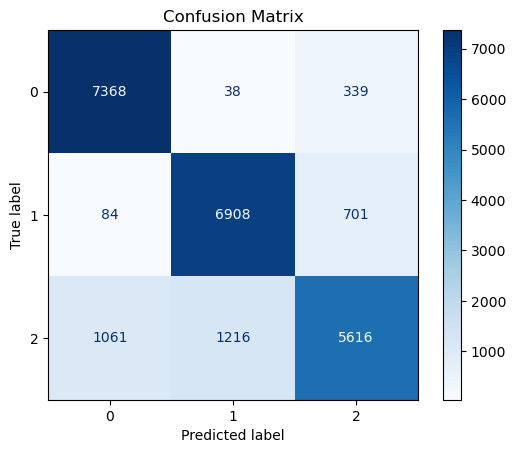

F1 Score: 0.85
ROC AUC Score: 0.93


In [48]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# ROC AUC Score
y_prob = best_knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

### Model 2 : Random Forest Algorithm

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      7745
           1       0.87      0.91      0.89      7693
           2       0.87      0.80      0.83      7893

    accuracy                           0.88     23331
   macro avg       0.88      0.88      0.88     23331
weighted avg       0.88      0.88      0.88     23331



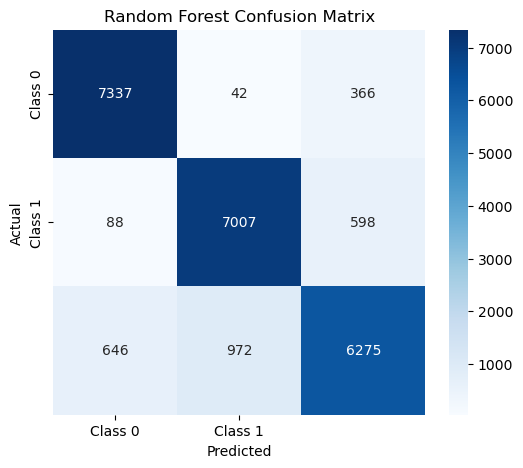

F1 Score: 0.88
ROC AUC Score: 0.96


In [49]:
# Import necessary libraries

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# ROC AUC Score
y_prob = rf_classifier.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

### Model 3: Adaboost Classifier Algorithm

Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.83      0.68      7745
           1       0.74      0.70      0.72      7693
           2       0.60      0.37      0.46      7893

    accuracy                           0.63     23331
   macro avg       0.64      0.64      0.62     23331
weighted avg       0.64      0.63      0.62     23331



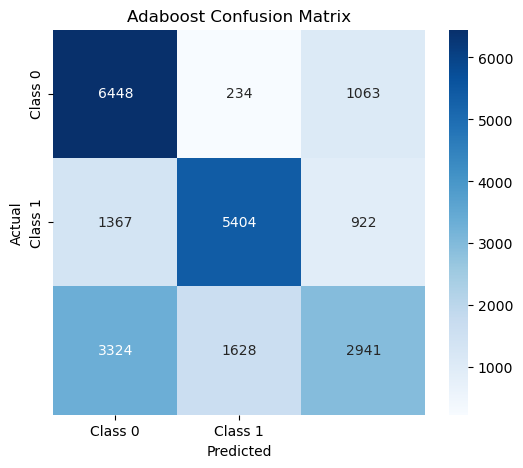

F1 Score: 0.62
ROC AUC Score: 0.77


In [50]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier


# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Adaboost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# ROC AUC Score
y_prob = adaboost_classifier.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

## Insights: 
Performance comparison between all the models,
- KNN Model     : F1 Score: 0.85
                  ROC AUC Score: 0.93
- Random Forest : F1 Score: 0.88
                  ROC AUC Score: 0.96
- AdaBoost      : F1 Score: 0.62
                  ROC AUC Score: 0.77  

## Conclusion: 
- Random forest seems to be better solution for this credit score classification problem. 
- Random forest giving F1 score of 0.88 